## Week 8 Pandas Data in Motion Challenge by Prince Ogwu

In [104]:
 # Read from a csv into pandas DataFrame object
missing_values = ['N/a', 'na', np.nan]
path = ('C:/datasets/coaster_db.csv')
df_coaster = pd.read_csv(path, na_values = missing_values)

In [137]:
#Import required library
import os
import statistics as st
import matplotlib.pyplot as plt #For visualization
import numpy as np #Working with Arrays
import pandas as pd #For data manipulation & analysis
import seaborn as sb # library for visualization
%matplotlib inline

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 1. How many columns and rows are in the dataset?

In [5]:
df_coaster.shape

(1087, 56)

In [50]:
# The number of columns in the dataset
cols=len(df_coaster.axes[1])
print("Number of Columns: "+str(cols))

Number of Columns: 56


In [51]:
# The number of rows in the dataset
rows=len(df_coaster.axes[0])
print("Number of rows: "+str(rows))

Number of rows: 1087


 ## 1. Is there any missing data?

In [6]:
# Confirm if we have missing value
df_coaster.isna().values.any()

# Yes there are missing values

True

## 3. Display the summary statistics of the numeric columns using the describe method.

In [10]:
# Check the summary of  numeric columns
df_coaster.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Inversions,932.0,1.547210,2.114073,0.0000,0.00000,0.0000,3.0000,14.0000
year_introduced,1087.0,1994.986201,23.475248,1884.0000,1989.00000,2000.0000,2010.0000,2022.0000
latitude,812.0,38.373484,15.516596,-48.2617,35.03105,40.2898,44.7996,63.2309
longitude,812.0,-41.595373,72.285227,-123.0357,-84.55220,-76.6536,2.7781,153.4265
speed1_value,937.0,53.850374,23.385518,5.0000,40.00000,50.0000,63.0000,240.0000
speed_mph,937.0,48.617289,16.678031,5.0000,37.30000,49.7000,58.0000,149.1000
height_value,965.0,89.575171,136.246444,4.0000,44.00000,79.0000,113.0000,3937.0000
height_ft,171.0,101.996491,67.329092,13.1000,51.80000,91.2000,131.2000,377.3000
Inversions_clean,1087.0,1.326587,2.030854,0.0000,0.00000,0.0000,2.0000,14.0000
Gforce_clean,362.0,3.824006,0.989998,0.8000,3.40000,4.0000,4.5000,12.0000


## 4.    Rename the following columns:
       -  coaster_name  ➡️  Coaster_Name
       - year_introduced ➡️ Year_Introduced
       - opening_date_clean ➡️ Opening_Date
       - speed_mph ➡️ Speed_mph
       - height_ft ➡️ Height_ft
       - Inversions_clean ➡️ Inversions
       - Gforce_clean ➡️ Gforce

In [192]:
# Rename a feature in the dataFrame

df_coaster.rename(columns = { 'coaster_name':'Coaster_Name',
                             'year_introduced': 'Year_Introduced',
                             'opening_date_clean': 'Opening_Date',
                             'speed_mph': 'Speed_mph',
                             'height_ft': 'Height_ft',
                             'Inversions_clean': 'Inversions',
                             'Gforce_clean':'Gforce'
    
}, inplace = True )

#df_coaster.columns.to_list()

## 5.   Are there any duplicated rows?

In [12]:
# Checking for duplicated rows
df_coaster.duplicated().values.any()

# There are no duplicated rows.

False

##  6.    What are the top 3 years with the most roller coasters introduced?




In [140]:
# df_coaster.Year_Introduced.head(3)
top_Coaster= df_coaster.groupby('Year_Introduced')['Coaster_Name'].count().sort_values(ascending= False).head(3)
top_Coaster

Year_Introduced
1999    49
2000    47
1998    32
Name: Coaster_Name, dtype: int64

## 7.    What is the average speed? Also display a plot to show it's distribution.

In [47]:
avg_Speed = df_coaster['speed1_value'].mean()
print(f'The Average speed is: {avg_Speed: .2f}')

The Average speed is:  53.85


<AxesSubplot:ylabel='Density'>

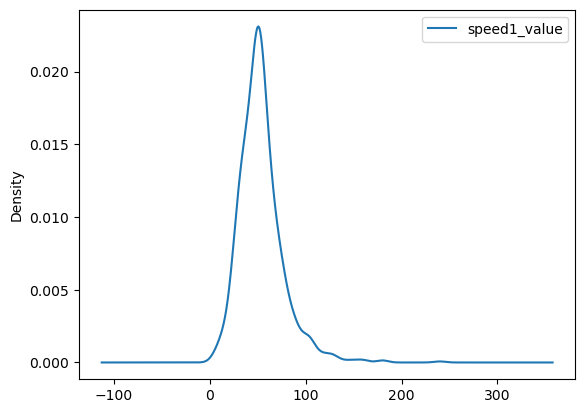

In [48]:
pd.DataFrame(df_coaster['speed1_value']).plot(kind ='density')

## 8.  Explore the feature relationships. Are there any positively or negatively correlated relationships?

In [18]:
df_coaster.corr().transpose()

,Inversions,Year_Introduced,latitude,longitude,speed1_value,Speed_mph,height_value,Height_ft,Inversions,Gforce
Inversions,1.000000,0.211003,-0.009815,0.061589,0.163419,0.252209,0.094811,0.171330,1.000000,0.356865
Year_Introduced,0.211003,1.000000,-0.070982,0.175913,0.210191,0.204853,0.087687,0.232150,0.228758,-0.066657
latitude,-0.009815,-0.070982,1.000000,-0.298488,-0.121847,-0.063757,-0.004265,0.011492,-0.014043,0.042871
longitude,0.061589,0.175913,-0.298488,1.000000,0.301179,0.051063,-0.092764,0.159733,0.087160,0.016485
speed1_value,0.163419,0.210191,-0.121847,0.301179,1.000000,0.851667,0.088761,0.815103,0.176105,0.379962
Speed_mph,0.252209,0.204853,-0.063757,0.051063,0.851667,1.000000,0.241461,0.829404,0.265763,0.489337
height_value,0.094811,0.087687,-0.004265,-0.092764,0.088761,0.241461,1.000000,1.000000,0.108199,0.337386
Height_ft,0.171330,0.232150,0.011492,0.159733,0.815103,0.829404,1.000000,1.000000,0.164246,0.475020
Inversions,1.000000,0.228758,-0.014043,0.087160,0.176105,0.265763,0.108199,0.164246,1.000000,0.345106
Gforce,0.356865,-0.066657,0.042871,0.016485,0.379962,0.489337,0.337386,0.475020,0.345106,1.000000


## 9.   Create your own question and answer it.

In [49]:
#Check the total number of features with missing values
df_coaster.isna().sum()

Coaster_Name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

## Remove the Soft opening date 1 column

In [65]:
# Drop Soft opening date.1 Column
df_coaster.drop('Soft opening date.1', inplace=True, axis=1)
print('Column successfully deleted')

Column successfully deleted


In [176]:

df_coaster.drop('Opening date', inplace=True, axis=1)
print('Column successfully deleted')

Column successfully deleted


## Speed1 value has 150 Missing values,fill the missing values with the mean

In [120]:
x= df_coaster['speed1_value'].mean()
df_coaster['speed1_value'].fillna(value=x, inplace=True)

In [121]:
df_coaster['speed1_value']

0        6.000000
1       53.850374
2       53.850374
3       53.850374
4       53.850374
          ...    
1082    53.000000
1083    73.000000
1084    59.300000
1085    34.000000
1086    58.000000
Name: speed1_value, Length: 1087, dtype: float64

In [122]:
df_coaster['speed1_value'].isna().sum()

0

## visualize speed1_value column using density plot

<AxesSubplot:ylabel='Density'>

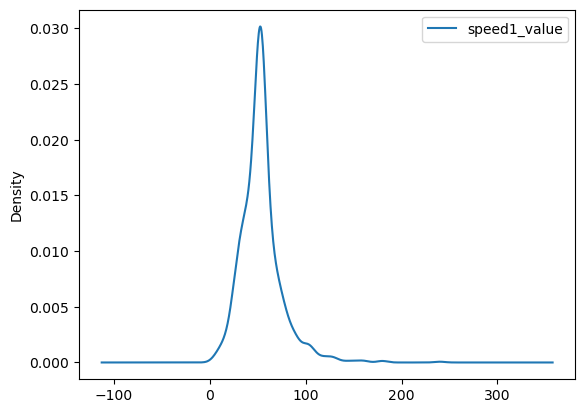

In [152]:
pd.DataFrame(df_coaster['speed1_value']).plot(kind ='density')

In [177]:
#Check for Data-type of DataFrame
df_coaster.dtypes

Coaster_Name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced                          object
Track layout    

In [191]:
#Change the Opening Date type to Datetime
df_coaster['Opening_Date']= pd.to_datetime(df_coaster['Opening_Date'])

df_coaster.Opening_Date

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: Opening_Date, Length: 1087, dtype: datetime64[ns]

# Plot a heatmap of missing values

<AxesSubplot:>

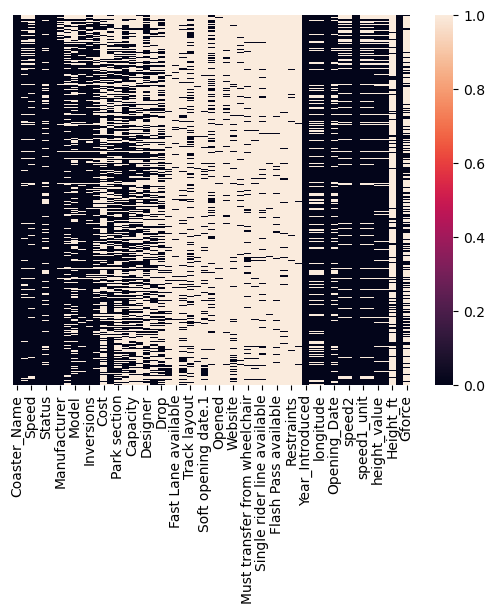

In [190]:
sb.heatmap(df_coaster.isna(), yticklabels=False)